# PolynomialFeatures

In [58]:
# Import function to create training and test set splits
from sklearn.model_selection import train_test_split
# Import function to automatically create polynomial features! 
from sklearn.preprocessing import PolynomialFeatures
# Import Linear Regression
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_absolute_error

import numpy as np

In [59]:
data = {"X": [0,1,2,3,4,5,6,7,8,9], "y": [2,6,7,7,4,3,2,2,3,11]}
df = pd.DataFrame(data=data)
df

,X,y
0,0,2
1,1,6
2,2,7
3,3,7
4,4,4
5,5,3
6,6,2
7,7,2
8,8,3
9,9,11


In [60]:
# como tenemos dos columnas, tenemos dos dimensiones. No confundir con el grado del polinomio, el grado es el número de curvas que el modelo va a tratar de encajar

In [61]:
# Test/train split
X_train, X_test, y_train, y_test = train_test_split(df['X'].values, df['y'].values, test_size=0.2)

In [62]:
X_train

array([5, 4, 3, 8, 2, 7, 0, 1], dtype=int64)

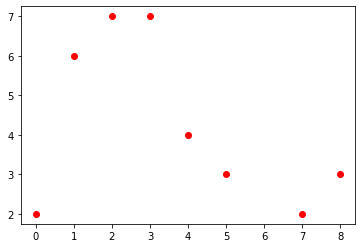

In [63]:
plt.scatter(X_train, y_train, color='red')

### Simple example:

In [64]:
# Antes de fit tenemos que pasar el grado que quieras. 

[[  1.   5.  25. 125.]
 [  1.   4.  16.  64.]
 [  1.   3.   9.  27.]
 [  1.   8.  64. 512.]
 [  1.   2.   4.   8.]
 [  1.   7.  49. 343.]
 [  1.   0.   0.   0.]
 [  1.   1.   1.   1.]]
(8, 4)
y_pred (8,)
Score: 0.95387144640876


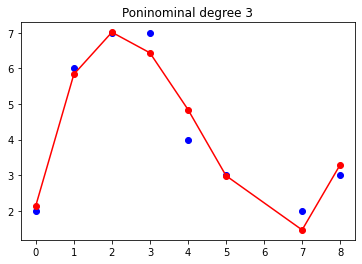

In [65]:
degree = 3  # vamos a tener tres coeficientes, x, x^2, x^3

# Paso nº 1 - Llamamos a fit_transform. Para cada una de las variables (en este caso solo tenemos una variable (x)), tendrá tantos coeficientes como grados. 
# Calculamos las pendientes de nuestras Xn
polinominal_model = PolynomialFeatures(degree) 
X_poly = polinominal_model.fit_transform(X_train.reshape(-1, 1), y_train)

#######
print(X_poly)   # la primera columnas es la secante (x^0), las columnas se van elevando a los grados por cada dato, x^0, x^1, x^2, x^3 asi por cada fila, que representa a cada elemento de X_poly 
print(X_poly.shape)

# Paso nº2
# Llamar a la regresión lineal entrenándola con la salida del fit_transform
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_poly, y_train)
y_pred = lin_reg_model.predict(X_poly)  # x_poly porque está ajustado a los grados del polinomio

print("y_pred", y_pred.shape)   
print("Score:", r2_score(y_train, y_pred))

# sorted para que la gráfica quede legible, si no va a intentar unir puntos no consecutivos
X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
plt.scatter(X_train_to_show, y_train_to_show, color='b')
X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
plt.plot(X_train_to_show, y_pred, color='red')
plt.scatter(X_train_to_show, y_pred, color='red')
plt.title("Poninominal degree " + str(degree))
plt.show()

### **To predict**

In [66]:
X_test

array([9, 6], dtype=int64)

In [67]:
# para datos nuevos también has que transformar X_poly 
# No hace falta pasar y_poly porque el modelo ya está entrenado de antes
X_test_poly = polinominal_model.fit_transform(X_test.reshape(-1, 1))

y_test_pred = lin_reg_model.predict(X_test_poly)

print("X_test\n", X_test)
print("X_test_poly\n", X_test_poly)
print("X_test_real\n", X_test)
print("y_test_pred\n", y_test_pred)

X_test
 [9 6]
X_test_poly
 [[  1.   9.  81. 729.]
 [  1.   6.  36. 216.]]
X_test_real
 [9 6]
y_test_pred
 [7.84864141 1.60619977]


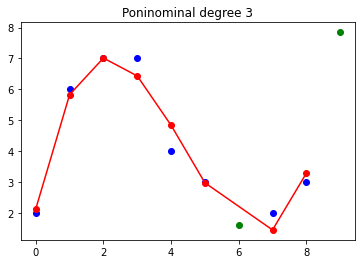

In [68]:
plt.scatter(X_train_to_show, y_train_to_show, color='b')
plt.plot(X_train_to_show, y_pred, color='red')
plt.scatter(X_train_to_show, y_pred, color='red')
plt.title("Poninominal degree " + str(degree))

plt.scatter(X_test, y_test_pred, color='green', label="X_test")

plt.show()
# linea roja es nuestra prediccion
# verde es conjunto test

In [69]:
print("Score test:", r2_score(y_test, y_test_pred))

Score test: 0.7509595161959527


In [44]:
y_test

array([3, 3], dtype=int64)

In [12]:
y_test_pred
# si nuestros valores estan entre 2 y 8, y nuestro modelo falla de media 4.9, es un valor de fallo bastante grande

array([4.93400011, 1.55318438])

In [13]:
mean_absolute_error(y_true=y_test, y_pred=y_test_pred)

0.6904078676101815

### Nice example

################
[[ 1.  5. 25.]
 [ 1.  4. 16.]
 [ 1.  3.  9.]
 [ 1.  8. 64.]
 [ 1.  2.  4.]
 [ 1.  7. 49.]
 [ 1.  0.  0.]
 [ 1.  1.  1.]]
(8, 3)
y_pred (8,)
Score: 0.4006317104908653
MAE: 1.5023474178403755


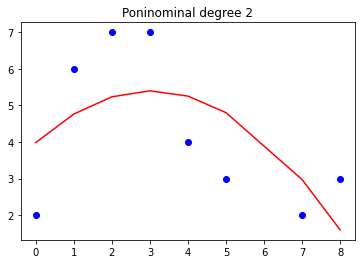

################
[[  1.   5.  25. 125.]
 [  1.   4.  16.  64.]
 [  1.   3.   9.  27.]
 [  1.   8.  64. 512.]
 [  1.   2.   4.   8.]
 [  1.   7.  49. 343.]
 [  1.   0.   0.   0.]
 [  1.   1.   1.   1.]]
(8, 4)
y_pred (8,)
Score: 0.95387144640876
MAE: 0.32216539679223355


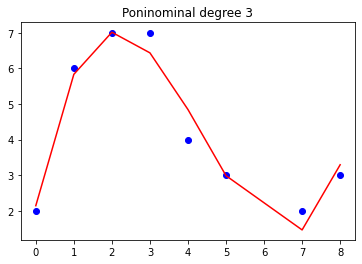

################
[[1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]]
(8, 5)
y_pred (8,)
Score: 0.9703727391825888
MAE: 0.24124797910702755


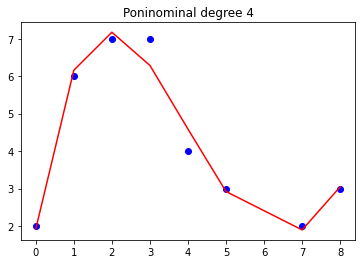

################
[[1.0000e+00 5.0000e+00 2.5000e+01 1.2500e+02 6.2500e+02 3.1250e+03]
 [1.0000e+00 4.0000e+00 1.6000e+01 6.4000e+01 2.5600e+02 1.0240e+03]
 [1.0000e+00 3.0000e+00 9.0000e+00 2.7000e+01 8.1000e+01 2.4300e+02]
 [1.0000e+00 8.0000e+00 6.4000e+01 5.1200e+02 4.0960e+03 3.2768e+04]
 [1.0000e+00 2.0000e+00 4.0000e+00 8.0000e+00 1.6000e+01 3.2000e+01]
 [1.0000e+00 7.0000e+00 4.9000e+01 3.4300e+02 2.4010e+03 1.6807e+04]
 [1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00]]
(8, 6)
y_pred (8,)
Score: 0.9754516872420802
MAE: 0.22231934731534708


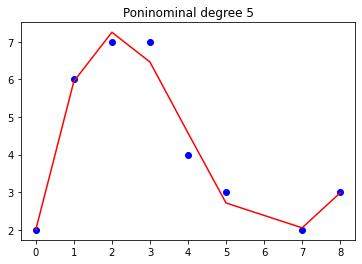

################
[[1.00000e+00 5.00000e+00 2.50000e+01 1.25000e+02 6.25000e+02 3.12500e+03
  1.56250e+04]
 [1.00000e+00 4.00000e+00 1.60000e+01 6.40000e+01 2.56000e+02 1.02400e+03
  4.09600e+03]
 [1.00000e+00 3.00000e+00 9.00000e+00 2.70000e+01 8.10000e+01 2.43000e+02
  7.29000e+02]
 [1.00000e+00 8.00000e+00 6.40000e+01 5.12000e+02 4.09600e+03 3.27680e+04
  2.62144e+05]
 [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
  6.40000e+01]
 [1.00000e+00 7.00000e+00 4.90000e+01 3.43000e+02 2.40100e+03 1.68070e+04
  1.17649e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00]
 [1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
  1.00000e+00]]
(8, 7)
y_pred (8,)
Score: 0.9768632926527662
MAE: 0.22231934734205194


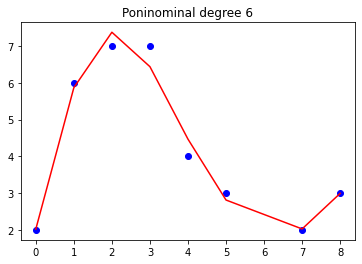

################
[[1.000000e+00 5.000000e+00 2.500000e+01 1.250000e+02 6.250000e+02
  3.125000e+03 1.562500e+04 7.812500e+04]
 [1.000000e+00 4.000000e+00 1.600000e+01 6.400000e+01 2.560000e+02
  1.024000e+03 4.096000e+03 1.638400e+04]
 [1.000000e+00 3.000000e+00 9.000000e+00 2.700000e+01 8.100000e+01
  2.430000e+02 7.290000e+02 2.187000e+03]
 [1.000000e+00 8.000000e+00 6.400000e+01 5.120000e+02 4.096000e+03
  3.276800e+04 2.621440e+05 2.097152e+06]
 [1.000000e+00 2.000000e+00 4.000000e+00 8.000000e+00 1.600000e+01
  3.200000e+01 6.400000e+01 1.280000e+02]
 [1.000000e+00 7.000000e+00 4.900000e+01 3.430000e+02 2.401000e+03
  1.680700e+04 1.176490e+05 8.235430e+05]
 [1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00]
 [1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
  1.000000e+00 1.000000e+00 1.000000e+00]]
(8, 8)
y_pred (8,)
Score: 1.0
MAE: 1.5805765585241716e-09


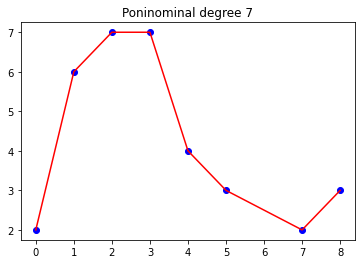

################
[[1.0000000e+00 5.0000000e+00 2.5000000e+01 1.2500000e+02 6.2500000e+02
  3.1250000e+03 1.5625000e+04 7.8125000e+04 3.9062500e+05]
 [1.0000000e+00 4.0000000e+00 1.6000000e+01 6.4000000e+01 2.5600000e+02
  1.0240000e+03 4.0960000e+03 1.6384000e+04 6.5536000e+04]
 [1.0000000e+00 3.0000000e+00 9.0000000e+00 2.7000000e+01 8.1000000e+01
  2.4300000e+02 7.2900000e+02 2.1870000e+03 6.5610000e+03]
 [1.0000000e+00 8.0000000e+00 6.4000000e+01 5.1200000e+02 4.0960000e+03
  3.2768000e+04 2.6214400e+05 2.0971520e+06 1.6777216e+07]
 [1.0000000e+00 2.0000000e+00 4.0000000e+00 8.0000000e+00 1.6000000e+01
  3.2000000e+01 6.4000000e+01 1.2800000e+02 2.5600000e+02]
 [1.0000000e+00 7.0000000e+00 4.9000000e+01 3.4300000e+02 2.4010000e+03
  1.6807000e+04 1.1764900e+05 8.2354300e+05 5.7648010e+06]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.000000

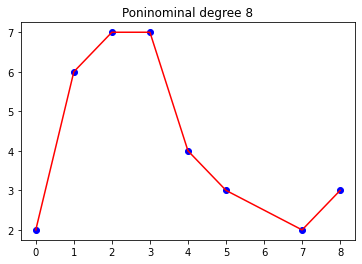

In [70]:
# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 8
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
scores = []
for degree in range(degree_min,degree_max+1):
    print("################")
    polinominal_model = PolynomialFeatures(degree) 
    X_poly = polinominal_model.fit_transform(X_train.reshape(-1, 1),y_train)

    #######
    print(X_poly)
    print(X_poly.shape)

    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_poly, y_train)
    y_pred = lin_reg_model.predict(X_poly)

    print("y_pred", y_pred.shape)
    print("Score:", r2_score(y_train, y_pred))
    print("MAE:", mean_absolute_error(y_true=y_train, y_pred=y_pred))
    X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
    plt.scatter(X_train_to_show, y_train_to_show, color='b')
    X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
    plt.plot(X_train_to_show, y_pred, color='red')
    plt.title("Poninominal degree " + str(degree))
    plt.show()
    input("Enter to next grade")

### Another nice example

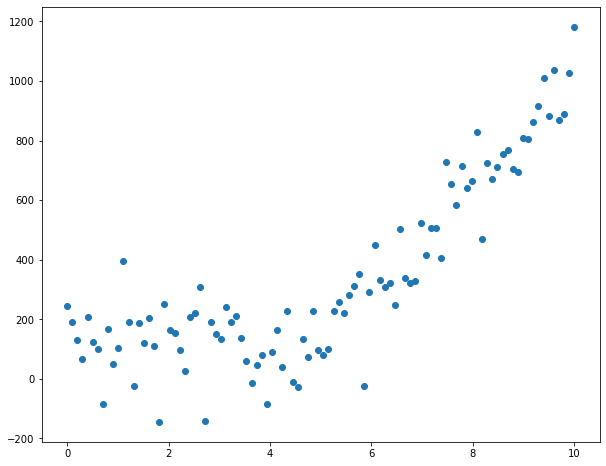

In [15]:
n_samples = 100
X = np.linspace(0, 10, 100)
y = X ** 3 + np.random.randn(n_samples) * 100 + 100
plt.figure(figsize=(10,8))
plt.scatter(X, y)

In [16]:
# Test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

################
(80, 3)
y_pred (80,)
Score: 0.879351279667923


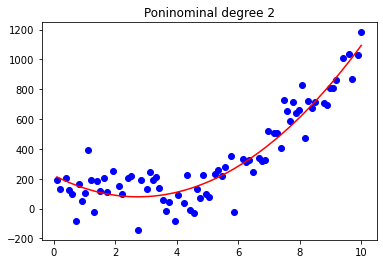

################
(80, 4)
y_pred (80,)
Score: 0.8799660084559193


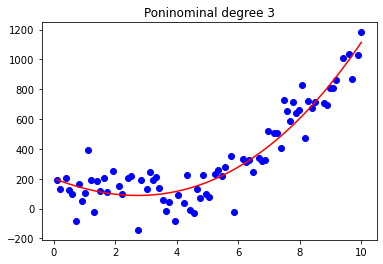

################
(80, 5)
y_pred (80,)
Score: 0.8887074845982306


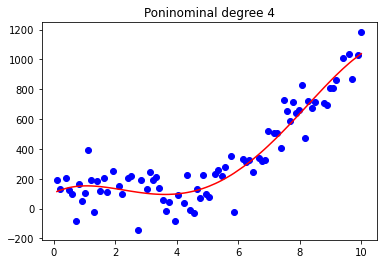

################
(80, 6)
y_pred (80,)
Score: 0.8896803766093564


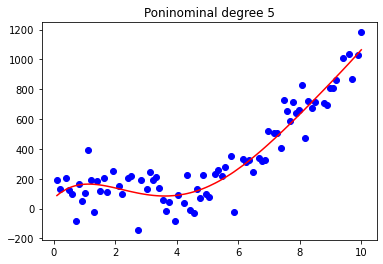

################
(80, 7)
y_pred (80,)
Score: 0.8982131814215026


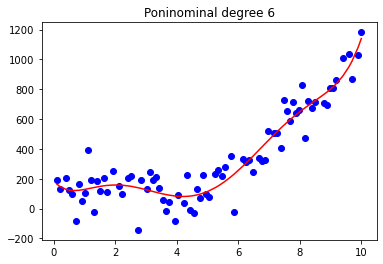

################
(80, 8)
y_pred (80,)
Score: 0.8983488433988668


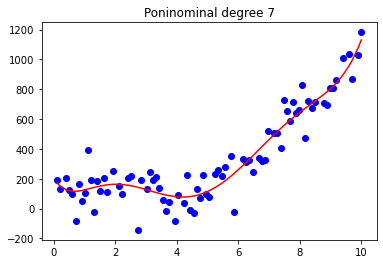

################
(80, 9)
y_pred (80,)
Score: 0.8989862796087945


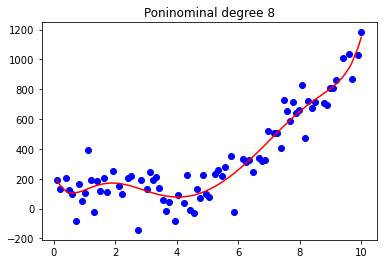

In [17]:
# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 8
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
scores = []
for degree in range(degree_min,degree_max+1):
    print("################")
    polinominal_model = PolynomialFeatures(degree) 
    X_poly = polinominal_model.fit_transform(X_train.reshape(-1, 1),y_train)

    #######
    print(X_poly.shape)

    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_poly, y_train)
    y_pred = lin_reg_model.predict(X_poly)

    print("y_pred", y_pred.shape)
    print("Score:", r2_score(y_train, y_pred))

    X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
    plt.scatter(X_train_to_show, y_train_to_show, color='b')
    X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
    plt.plot(X_train_to_show, y_pred, color='red')
    plt.title("Poninominal degree " + str(degree))
    plt.show()
    input("Enter to next grade")

## 2. Another

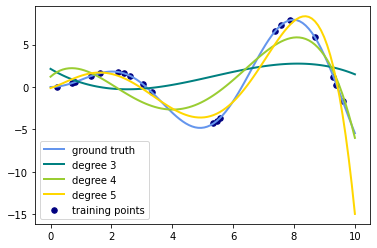

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

In [ ]:
# si tenemos muchas dimensiones no podemos pintarlas, entonces nos quedariamos con el porcentaje de mejora entre un grado y otro y tendríamos que razonar con cual quedarse